### Biblioteki używane w rozwiązaniu zadania

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Zadanie

## Czynności przygotowawcze

Najpierw wczytujemy dane z plików.

In [2]:
# labels (column names)
column_names = pd.io.parsers.read_csv("materials/dataset/breast-cancer.labels", header = None)
column_names = list(itertools.chain.from_iterable(column_names.values.tolist()))

# training data
training_set = pd.io.parsers.read_csv("materials/dataset/breast-cancer-train.dat", header = None, names = column_names)

# validating set
validate_set = pd.io.parsers.read_csv("materials/dataset/breast-cancer-validate.dat", header = None, names = column_names)

Zobaczmy, jak wyglądają dane treningowe.

In [3]:
training_set

,patient ID,Malignant/Benign,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,891923,B,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
296,891936,B,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
297,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
298,892214,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676


Teraz wyświetlamy histogram i wykres dla przykładowej kolumny - niech będzie nią średni promień (*radius (mean)*) z danych treningowych.

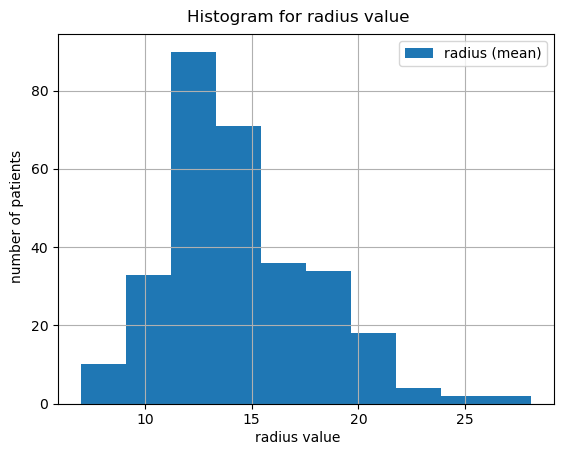

In [4]:
fig, axes = plt.subplots()
hist = training_set['radius (mean)'].hist(ax = axes, legend = True)
plt.suptitle('Histogram for radius value', y = 0.93)
fig.text(0.5, 0.03, 'radius value', ha = 'center')
fig.text(0.05, 0.5, 'number of patients', va = 'center', rotation = 'vertical')
plt.show()

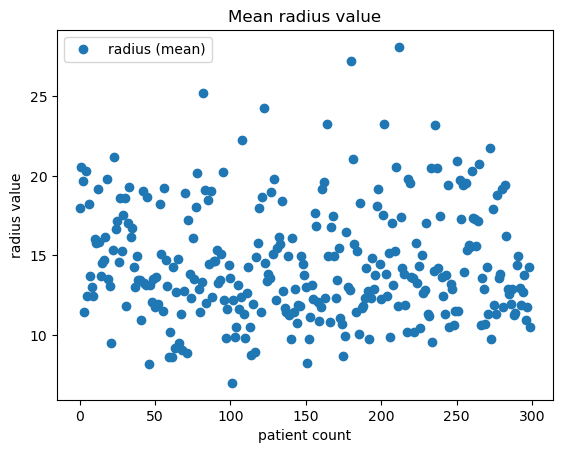

In [5]:
plot = training_set['radius (mean)'].plot(xlabel = 'patient count', ylabel = 'radius value', title = 'Mean radius value', legend = True, style = 'o')

## Metoda najmniejszych kwadratów

Poniżej przedstawiamy wszystkie kroki wspólnie zarówno dla liniowej, jak i kwadratowej metody najmniejszych kwadratów.

Na początek przygotujemy macierze $A$ dla obu zbiorów - zarówno treningowego, jak i walidującego.

In [6]:
# Linear Representation

# A matrix for training data
training_set_data = training_set.drop(['patient ID', 'Malignant/Benign'], axis = 1)
A_linear_training = training_set_data.values

# A matrix for validating set
training_set_data = validate_set.drop(['patient ID', 'Malignant/Benign'], axis = 1)
A_linear_validate = training_set_data.values 

In [7]:
# Quadratic Representation Training set

training_set_data = training_set[["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]]
A_square_training_data = training_set_data.values

#intermediate calculations
val_1 = A_square_training_data[:, 0][:, np.newaxis] * A_square_training_data[:,1 : 4]
val_2 = A_square_training_data[:, 1][:, np.newaxis] * A_square_training_data[:,2 : 4]
val_3 = A_square_training_data[:, 2][:, np.newaxis] * A_square_training_data[:,3 : 4]

# Stack all the columns horizontally
A_square_training = np.hstack((A_square_training_data, A_square_training_data**2, val_1, val_2, val_3))

In [8]:
# Quadratic Representation Validation set

validate_set_data = validate_set[["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]]
A_square_validate_data = validate_set_data.values

#intermediate calculations
val_1 = A_square_validate_data[:, 0][:, np.newaxis] * A_square_validate_data[:,1 : 4]
val_2 = A_square_validate_data[:, 1][:, np.newaxis] * A_square_validate_data[:,2 : 4]
val_3 = A_square_validate_data[:, 2][:, np.newaxis] * A_square_validate_data[:,3 : 4]

# Stack all the columns horizontally
A_square_validate = np.hstack((A_square_validate_data, A_square_validate_data**2, val_1, val_2, val_3))

Teraz przygotujemy dla obu zbiorów wektor $b$. Będzie on używany w obu podejściach, tj. liniowym i kwadratowym.

In [9]:
# b vector for training data
b_training = np.array(training_set[['Malignant/Benign']]).flatten()
b_training = np.where(b_training == 'M', 1, -1)

# b vector for validating set
b_validate = np.array(validate_set[['Malignant/Benign']]).flatten()
b_validate = np.where(b_validate == 'M', 1, -1)

Poniżej znajdujemy wektor wag $w$ dla zbioru treningowego, korzystając z odpowiednich macierzy $A$ oraz wyznaczonego wektora $b$. Dzięki nim znajdziemy rozwiązanie *równania normalnego*.

In [10]:
# Transposing matrix A_linear_training and calculating weights vector `w_linear`
AT_linear = np.transpose(A_linear_training)
w_linear = np.linalg.solve(np.dot(AT_linear, A_linear_training), np.dot(AT_linear, b_training))

In [11]:
# Taking the transpose of A_square_training and calculating weights vector `w_square`
AT_square = np.transpose(A_square_training)
w_square = np.linalg.solve(np.dot(AT_square, A_square_training), np.dot(AT_square, b_training))

Policzymy teraz współczynnik uwarunkowania macierzy, $cond(A^TA)$ (nie bierzemy samej macierzy $A$ ze względu na sposób rozwiązania). Użyjemy funkcji *np.linalg.norm* (liczenie ze wzoru) oraz *np.linalg.cond*.

In [12]:
# A matrix transposed multiplied by A matrix, as mentioned above
ATA_linear = np.dot(AT_linear, A_linear_training)

cond_linear_norm = (np.linalg.norm(ATA_linear) * np.linalg.norm(np.linalg.inv(ATA_linear)))
print(cond_linear_norm)
cond_linear_cond = np.linalg.cond(ATA_linear)
print(cond_linear_cond)

2078175796647.1704
1809248222570.959


In [13]:
# Same as in linear case
ATA_square = np.dot(AT_square, A_square_training)

cond_square_norm = (np.linalg.norm(ATA_square) * np.linalg.norm(np.linalg.inv(ATA_square)))
print(cond_square_norm)
cond_square_cond = np.linalg.cond(ATA_square)
print(cond_square_cond)

9.257864223346327e+17
9.056817074937996e+17


Teraz sprawdzimy, jak otrzymany dla zbioru treningowego wektor wag $w$ przewiduje typ nowotworu. Korzystając z niego i macierzy $A$ dla zbioru walidującego, tworzymy wektor $p$ i porównujemy go z wektorem $b$ dla zbioru sprawdzającego. Badamy również liczbę przypadków **false positives** i **false negatives**, tzn. kiedy model przewiduje nowotwór złośliwy, gdy w rzeczywistości jest łagodny i vice-versa.

In [14]:
# p vector used to validate prediction of a linear representation
p_linear = np.dot(A_linear_validate, w_linear)

p_linear_check = np.where(p_linear > 0, 1, -1)
p_linear_compare = np.where(p_linear_check == b_validate, True, False)

p_linear_false_positives = np.where((p_linear_check == 1) & (b_validate == -1))
p_linear_false_negatives = np.where((p_linear_check == -1) & (b_validate == 1))

p_linear_compare

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [15]:
# p vector used to validate prediction of a quadratic representation
p_square = np.dot(A_square_validate, w_square)

p_square_check = np.where(p_square > 0, 1, -1)
p_square_compare = np.where(p_square_check == b_validate, True, False)

p_square_false_positives = np.where((p_square_check == 1) & (b_validate == -1))
p_square_false_negatives = np.where((p_square_check == -1) & (b_validate == 1))

p_square_compare

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,

## Wyniki końcowe i analiza

Pod koniec patrzymy, ile przypadków zostało zaklasyfikowano poprawnie oraz ile zaobserwowano **false positives** i **false negatives** dla obu reprezentacji.

In [16]:
print("All patients:", p_linear_compare.size)
print("Correctly recognized:", np.where(p_linear_compare)[0].size)
print("False positives:", p_linear_false_positives[0].size)
print("False negatives:", p_linear_false_negatives[0].size)

All patients: 260
Correctly recognized: 252
False positives: 6
False negatives: 2


In [17]:
print("All patients:", p_square_compare.size)
print("Correctly recognized:", np.where(p_square_compare)[0].size)
print("False positives:", p_square_false_positives[0].size)
print("False negatives:", p_square_false_negatives[0].size)

All patients: 260
Correctly recognized: 240
False positives: 15
False negatives: 5


#### Spróbujmy teraz przeprowadzić analizę wyników, które się zgadzają przy obu reprezentacjach.

W tym celu stworzymy `comparison_matrix` - macierz, w której zaliczamy nowotwór do łagodnych tylko wtedy, gdy w obu reprezentacjach zaliczyliśmy go do łagodnych.  

In [18]:
comparison_matrix = np.where(p_square_check == p_linear_check, p_linear_check, -1)

In [19]:
np.where(np.where(comparison_matrix == b_validate, True, False))[0].size

252

Wyniki tego modelu są poprawne w $252/260 \approx 97\%$ przypadkach. Pokazuje to, że różnice w działaniu metody liniowej i kwadratowej są niewielkie.

In [20]:
np.where(np.where(comparison_matrix == b_validate, True, False))[0].size

252

In [21]:
p_comparison_false_positives = np.where((comparison_matrix == 1) & (b_validate == -1))
p_comparison_false_negatives = np.where((comparison_matrix == -1) & (b_validate == 1))

Liczenie **false positives** i **false negatives** w nowym modelu:

In [22]:
p_comparison_false_positives[0].size

2

In [23]:
p_comparison_false_negatives[0].size

6